In [2]:
import pandas as pd

# Load dataset
file_path = "Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Drop Person ID as it's just an identifier
df = df.drop(columns=['Person ID'])

In [4]:
import numpy as np

# Function to split blood pressure into systolic and diastolic
def split_bp(bp):
    try:
        systolic, diastolic = bp.split('/')
        return pd.Series([int(systolic), int(diastolic)])
    except:
        return pd.Series([np.nan, np.nan])  # Handle any missing or incorrect data

# Apply function and create new columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].apply(split_bp)

# Drop the original Blood Pressure column
df = df.drop(columns=['Blood Pressure'])

In [5]:
# List of categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Convert categorical variables into numeric form using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the new dataframe with encoded values
df_encoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Male,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,126,83,True,...,False,False,False,False,True,False,False,False,True,False
1,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,False
2,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,False
3,28,5.9,4,30,8,85,3000,140,90,True,...,False,True,False,False,False,False,False,True,False,True
4,28,5.9,4,30,8,85,3000,140,90,True,...,False,True,False,False,False,False,False,True,False,True


In [6]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['Quality of Sleep'])
y = df_encoded['Quality of Sleep']

In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Compute error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.05148721340486611
R-squared (R²): 0.9658713674991313


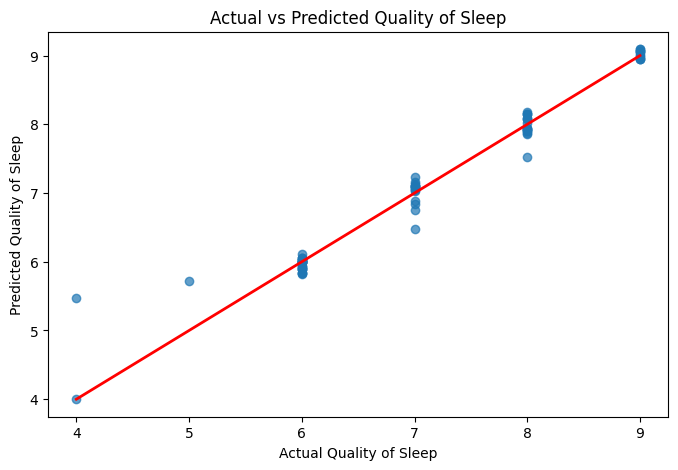

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Quality of Sleep")
plt.ylabel("Predicted Quality of Sleep")
plt.title("Actual vs Predicted Quality of Sleep")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Ideal line
plt.show()

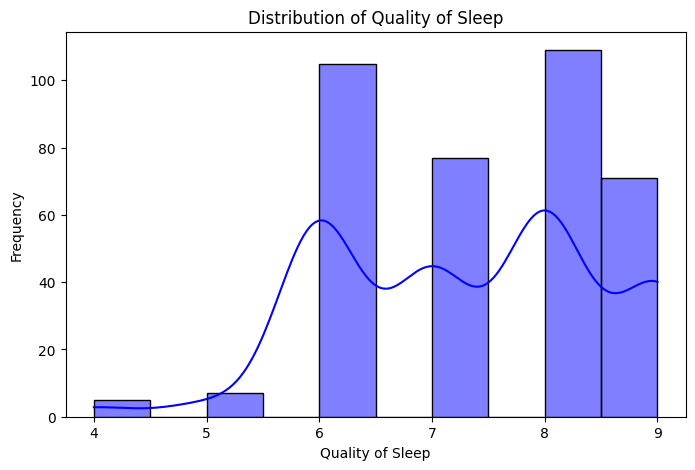

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=10, kde=True, color="blue")
plt.xlabel("Quality of Sleep")
plt.ylabel("Frequency")
plt.title("Distribution of Quality of Sleep")
plt.show()

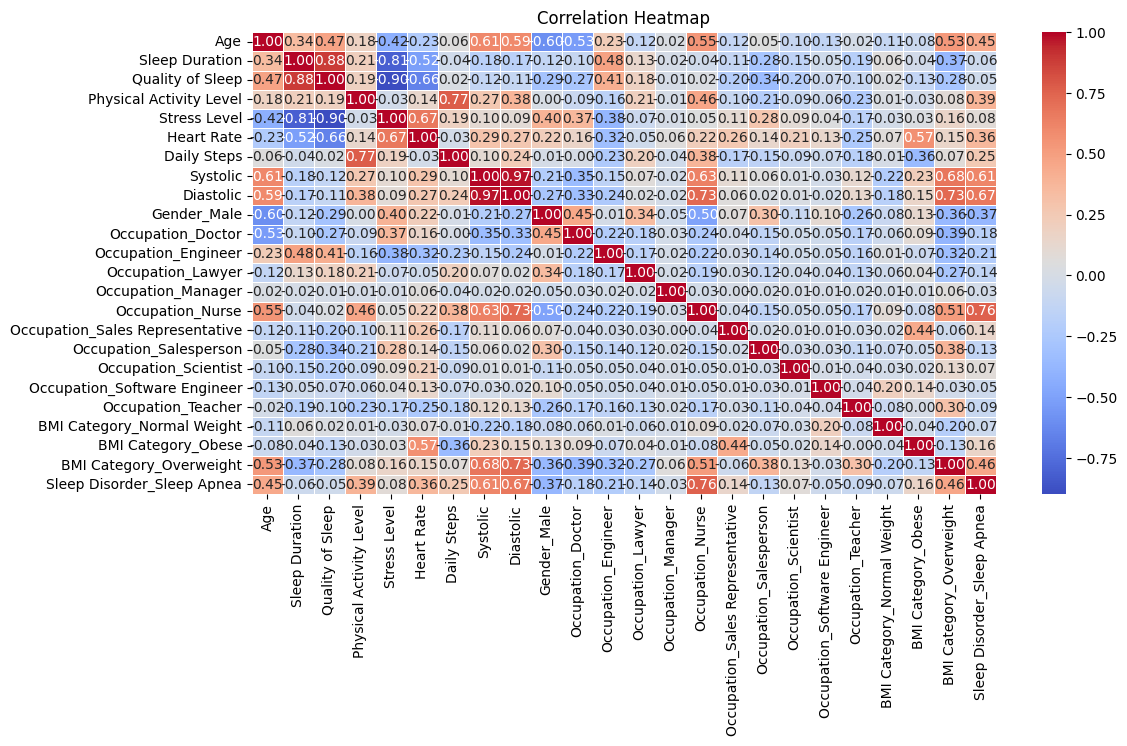

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

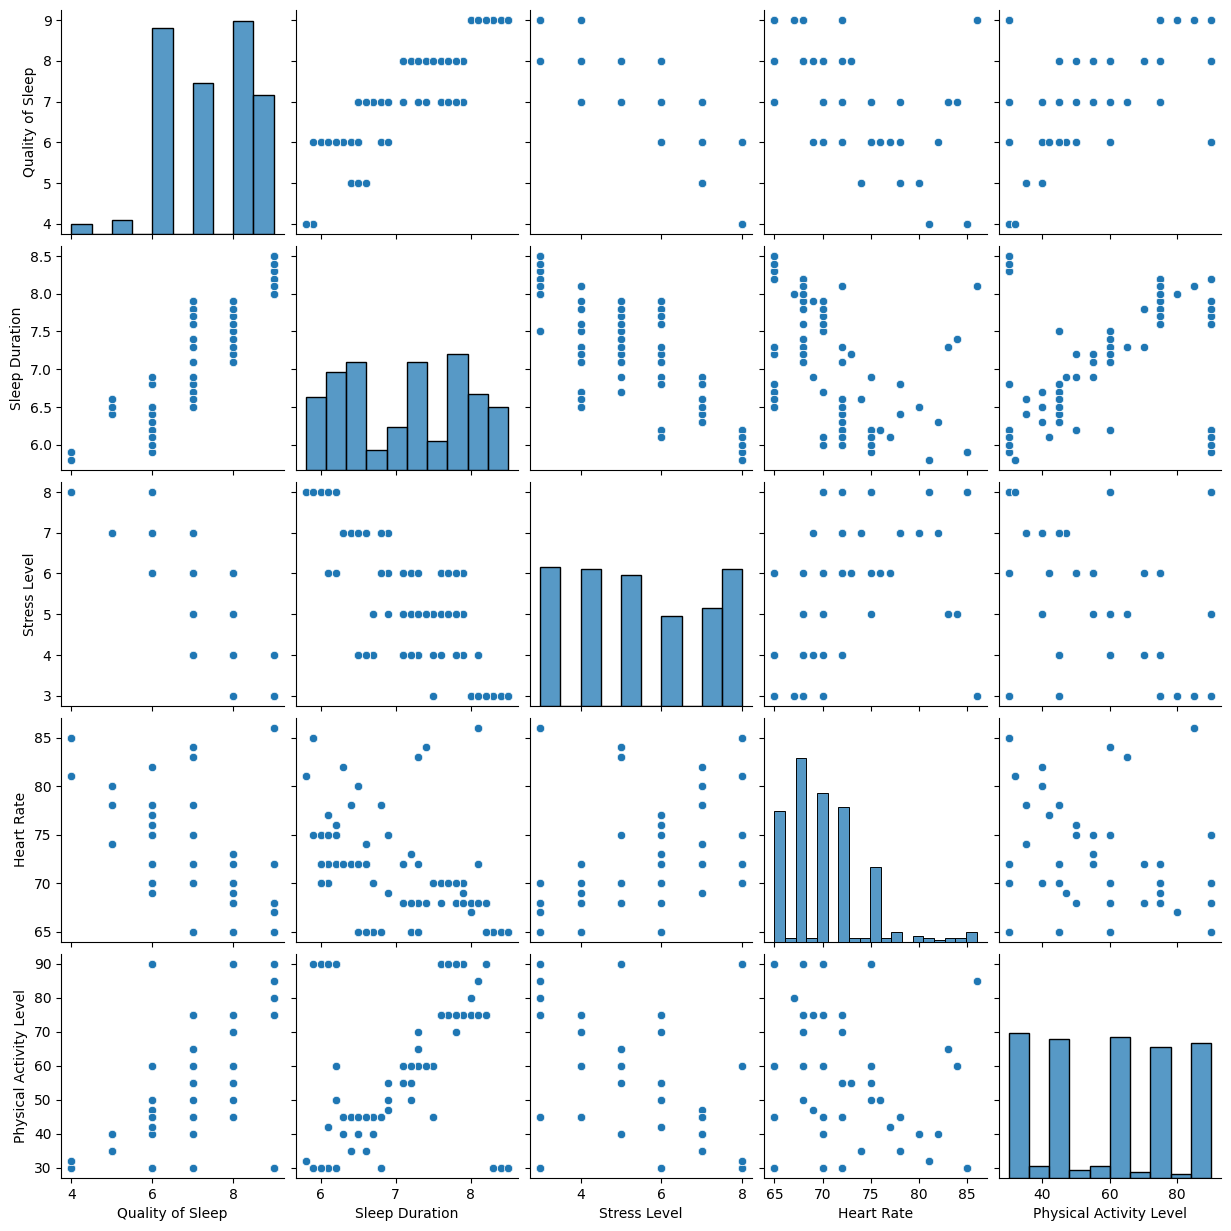

In [13]:
important_features = ["Quality of Sleep", "Sleep Duration", "Stress Level", "Heart Rate", "Physical Activity Level"]

sns.pairplot(df_encoded[important_features])
plt.show()

C:\Users\satvi\AppData\Local\Temp\ipykernel_16896\2802513796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded["Quality of Sleep"], y=df_encoded["Stress Level"], palette="coolwarm")


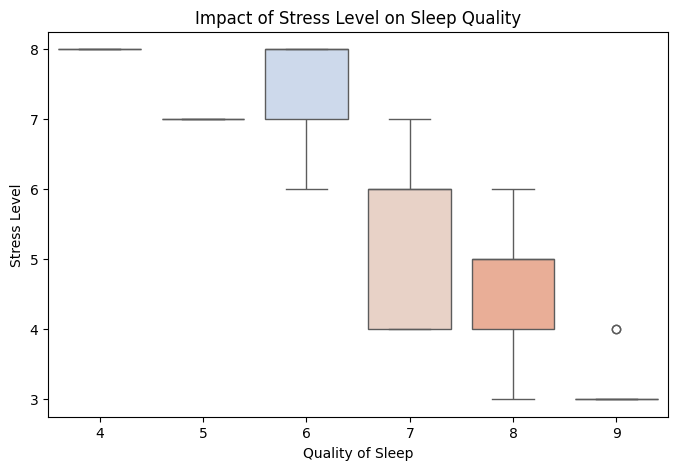

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_encoded["Quality of Sleep"], y=df_encoded["Stress Level"], palette="coolwarm")
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.title("Impact of Stress Level on Sleep Quality")
plt.show()

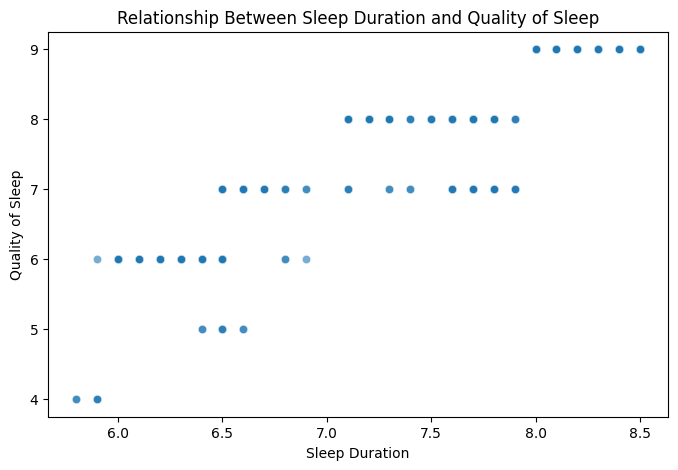

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_encoded["Sleep Duration"], y=df_encoded["Quality of Sleep"], alpha=0.6)
plt.xlabel("Sleep Duration")
plt.ylabel("Quality of Sleep")
plt.title("Relationship Between Sleep Duration and Quality of Sleep")
plt.show()

C:\Users\satvi\AppData\Local\Temp\ipykernel_16896\3870081934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Sleep Disorder"], y=df["Quality of Sleep"], palette="viridis", errorbar=None)


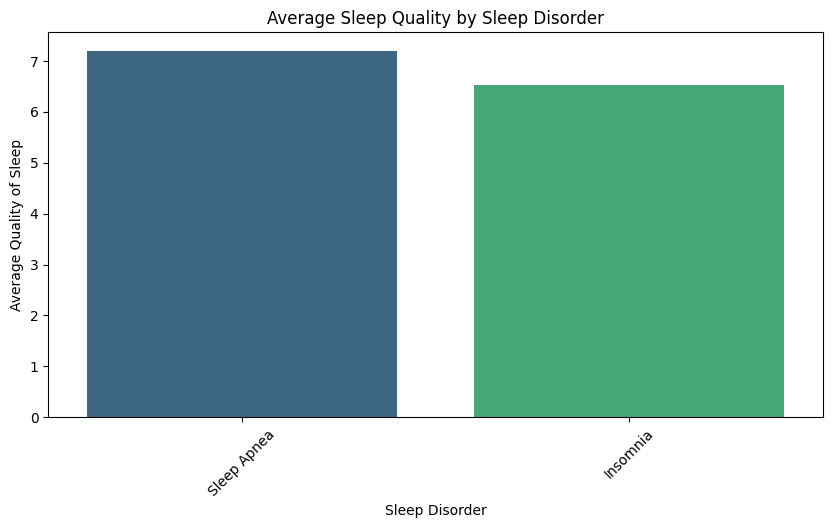

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Sleep Disorder"], y=df["Quality of Sleep"], palette="viridis", errorbar=None)
plt.xticks(rotation=45)
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Quality of Sleep")
plt.title("Average Sleep Quality by Sleep Disorder")
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [18]:
# Initialize remaining models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    if name == "SVR":  # Use scaled data for SVR
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R² Score": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                        MSE  R² Score
Decision Tree      0.026667  0.982324
Random Forest      0.024588  0.983702
Gradient Boosting  0.016029  0.989375
SVR                0.182620  0.878949
XGBoost            0.022586  0.985029


C:\Users\satvi\AppData\Local\Temp\ipykernel_16896\1209259920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="coolwarm")


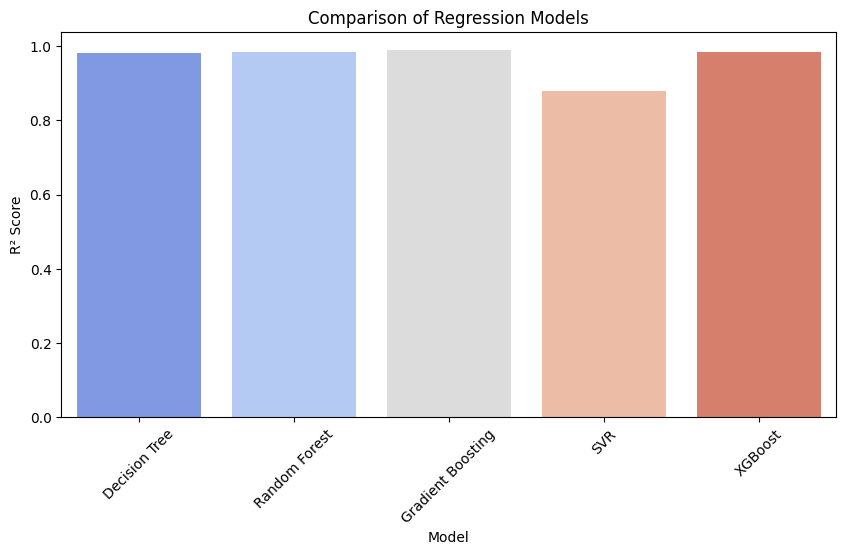

In [19]:
# Bar plot for R² scores
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="coolwarm")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.title("Comparison of Regression Models")
plt.xticks(rotation=45)
plt.show()

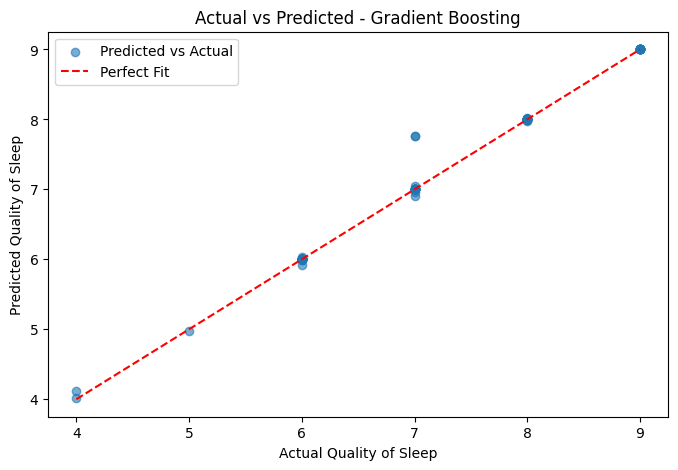

In [20]:
best_model_name = results_df["R² Score"].idxmax()
best_model = models[best_model_name]

if best_model_name == "SVR":
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_best, alpha=0.6, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Quality of Sleep")
plt.ylabel("Predicted Quality of Sleep")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.legend()
plt.show()

In [21]:
import joblib
joblib.dump(model, "sleep_model.pkl")

['sleep_model.pkl']

In [22]:
print(X.columns.tolist())
print("Total columns:", len(X.columns))

['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic', 'Gender_Male', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_Sleep Apnea']
Total columns: 23
